# Brain Age Prediction ElasticNet

In [1]:
path=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models'
import sys
sys.path.append(path_) 

# Regressor

In [2]:

from Plotter import Plotter
from sklearn.dummy import DummyRegressor
from base_regressor import BaseRegressor
from skopt.space import Categorical

class DummyRegressorModel(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, 
                 fit_params_search=None, model_params_search=None, fit_params_train=None, 
                 model_params_train=None, name_model="DummyRegressor"):
        
        super().__init__(save_path, scaler, params, params_space, 
                         fit_params_search, model_params_search, 
                         fit_params_train, model_params_train, name_model)

        self.model_ml = DummyRegressor  # Se define el modelo dummy
        
        # Definir parámetros por defecto si no se proporcionan
        if params is None:
            self.params = {
                'strategy': 'mean'  # Otras opciones: 'median', 'constant', 'quantile'
            }

        # Definir espacio de búsqueda para estrategias dummy
        if params_space is None:
            self.params_space = {
                'strategy': Categorical(['mean', 'median', 'constant'])
            }



c:\python_env\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

model = DummyRegressorModel()
Plotters = Plotter()

# Parametros de Plot
colorset = 'Olive'
nameset = 'Dummy'

#parametros de scaler
#1:sin scaler 2:Zscore 3:MinMax
Scaler_reg_train=2

#scaler = MinMaxScaler()
Scaler_reg = StandardScaler()



In [4]:
#72 features
features = ['Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_RPD_CING_right', 'Alpha2_canon_RPD_PARIET_left', 'Alpha2_canon_RPD_PARIET_right', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_EPP_HPC_left', 'Low_subj_spec_EPP_HPC_right', 'Low_subj_spec_EPP_CING_left', 'Low_subj_spec_EPP_CING_right', 'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_left', 'Low_subj_spec_EPP_OCC_right', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'TF_ORB_left', 'TF_ORB_right', 'TF_IFG_left', 'TF_IFG_right', 'TF_MFG_left', 'TF_MFG_right', 'TF_SFG_left', 'TF_SFG_right', 'TF_HPC_left', 'TF_HPC_right', 'TF_INS_left', 'TF_INS_right', 'IAF_ORB_left', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'IAF_MFG_left', 'IAF_MFG_right', 'IAF_SFG_left', 'IAF_SFG_right', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_INS_left', 'IAF_INS_right', 'IAF_OCC_left', 'IAF_OCC_right']

# DATA

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle

file_path_CN = f'{path}BrainAge_MachineLearning_MultipleModels/Data/CN_freq.xlsx'

df_CN = pd.read_excel(file_path_CN)


df_CN_filtrado = df_CN[(df_CN['Age'] >=20) & (df_CN['Age'] <= 90)].reset_index(drop=True)


X_CN = df_CN_filtrado[features]
y_CN = df_CN_filtrado["Age"]
ID_CN = df_CN_filtrado["ID_unique"]

#Scaler segun algoritmo
scaler = StandardScaler()
scaler.fit(X_CN)

X_CN_scaled = scaler.transform(X_CN)

X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)

df_concatenado_CN = pd.concat([X_CN, y_CN, ID_CN], axis=1, ignore_index=False)

In [12]:
df_concatenado_CN

,Alpha2_canon_EPP_HPC_left,Alpha2_canon_EPP_HPC_right,Alpha2_canon_EPP_PARIET_left,Alpha2_canon_EPP_PARIET_right,Alpha2_canon_EPP_OCC_left,Alpha2_canon_EPP_OCC_right,Alpha2_canon_RPD_HPC_left,Alpha2_canon_RPD_HPC_right,Alpha2_canon_RPD_CING_left,Alpha2_canon_RPD_CING_right,...,IAF_SFG_left,IAF_SFG_right,IAF_HPC_left,IAF_HPC_right,IAF_INS_left,IAF_INS_right,IAF_OCC_left,IAF_OCC_right,Age,ID_unique
0,0.008116,0.007831,0.007685,0.006256,0.006911,0.008990,0.001159,0.001119,0.000992,0.001092,...,8.9375,8.8750,9.000000,8.916667,9.00,8.625,8.833333,8.791667,33.0,0
1,0.014647,0.013471,0.013073,0.013822,0.021933,0.017799,0.002092,0.001924,0.001498,0.001757,...,11.6875,11.6875,11.500000,11.666667,11.50,11.625,11.375000,11.500000,57.0,1
2,0.004465,0.003429,0.005261,0.004030,0.006252,0.006698,0.000638,0.000490,0.000576,0.000561,...,10.0625,10.0625,10.083333,9.833333,10.00,10.375,10.125000,10.166667,32.0,2
3,0.011666,0.009387,0.011927,0.012085,0.018365,0.018517,0.001667,0.001341,0.001841,0.002468,...,11.1875,11.0625,11.166667,10.916667,11.00,10.875,11.208333,11.083333,21.0,3
4,0.017311,0.009914,0.012829,0.016644,0.024068,0.020074,0.002473,0.001416,0.002323,0.003023,...,10.2500,10.1875,10.083333,10.166667,10.25,10.250,10.250000,10.250000,36.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,0.006954,0.006618,0.005141,0.005685,0.007440,0.006692,0.000993,0.000945,0.000795,0.000853,...,8.0000,8.5625,8.000000,12.000000,8.00,10.000,8.000000,9.041667,57.0,1379
1319,0.009189,0.008986,0.008607,0.008971,0.008588,0.009346,0.001313,0.001284,0.000983,0.001144,...,8.3125,8.5000,8.750000,9.666667,8.50,9.250,8.958333,9.625000,48.0,1380
1320,0.010784,0.010763,0.007001,0.007620,0.008773,0.008320,0.001541,0.001538,0.000889,0.000999,...,9.2500,9.0625,8.666667,8.583333,9.00,9.000,8.958333,8.000000,57.0,1381
1321,0.011437,0.011171,0.009038,0.011523,0.009255,0.009590,0.001634,0.001596,0.001084,0.001123,...,9.0625,9.0000,9.333333,8.583333,8.50,8.625,9.916667,9.708333,69.0,1382


# Hyperparameter Tuning

In [ ]:
#'neg_mean_absolute_error'
#'neg_mean_squared_error'
#'neg_root_mean_squared_error'
#'explained_variance'
#'r2'

opt_model, best_params = model.search_best_model (X=X_CN_scaled, y=y_CN, n_iter_=50, scoring_metric='neg_mean_absolute_error')


In [6]:
with open(f'results_model/opt_model.pickle', 'rb') as file:
    opt_model= pickle.load(file)

In [ ]:
score = opt_model.cv_results_['mean_test_score'][:50]
Plotters.plot_iteration(y=score, title='BayesSearch', xlabel='Iteration', ylabel='score', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2, band_width=0.5)

In [ ]:
best_params_ = model.best_hyper(num_best=10, opt_model=opt_model, num_max=50)
best_params_

In [9]:
best_params=opt_model.best_params_

# Training

In [11]:
results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train,df_CN_avg_test= model.trainer(
        X=X_CN,
        y=y_CN,
        ID_label='ID_unique',
        ID=ID_CN,
        n_splits=10,
        n_iterations=20,
        #params_=best_params,
        scaler=Scaler_reg_train
    )

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_train = pd.concat([results_labels_df_train, temp_df_train], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:209: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([resul

In [12]:
results_training = [results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train, df_CN_avg_test]


In [21]:
with open('results_model/results_training.pkl', 'wb') as f:
    pickle.dump(results_training, f)

In [7]:
import pickle 

In [8]:
with open('results_model/results_training.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

results_labels_df_CN_train, results_labels_df_CN_test, results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train, df_CN_avg_test = loaded_results

In [13]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score

# Crear listas para almacenar las métricas de cada fold
mae_list = []
mae_corrected_list = []
r2_list = []
r2_corrected_list = []

# Iterar sobre cada DataFrame en la lista
for df in results_per_fold_CN_test:
    # Calcular MAE y R2 para y_pred
    mae = mean_absolute_error(df['y_labels'], df['y_pred'])
    r2 = r2_score(df['y_labels'], df['y_pred'])
    
    # Calcular MAE y R2 para y_pred_corrected
    mae_corrected = mean_absolute_error(df['y_labels'], df['y_pred_corrected'])
    r2_corrected = r2_score(df['y_labels'], df['y_pred_corrected'])
    
    # Agregar los valores a las listas
    mae_list.append(mae)
    mae_corrected_list.append(mae_corrected)
    r2_list.append(r2)
    r2_corrected_list.append(r2_corrected)

# Crear un DataFrame con los resultados
metrics_df = pd.DataFrame({
    'Fold': range(1, len(results_per_fold_CN_test) + 1),
    'MAE': mae_list,
    'MAE_corrected': mae_corrected_list,
    'R2': r2_list,
    'R2_corrected': r2_corrected_list
})

# Mostrar las primeras filas del DataFrame de métricas
print(metrics_df.head())


   Fold        MAE  MAE_corrected        R2  R2_corrected
0     1  19.290851   0.000000e+00 -0.007757           1.0
1     2  18.395071   4.915032e-15 -0.001334           1.0
2     3  19.531389   0.000000e+00 -0.000046           1.0
3     4  19.015406   4.736952e-15 -0.003995           1.0
4     5  18.320890   0.000000e+00 -0.004088           1.0


In [14]:
output_file = "results/metrics_results_per_fold.xlsx"
metrics_df.to_excel(output_file, index=False, engine='openpyxl')

In [8]:
df_CN_seleccion = df_CN_filtrado[['ID_unique', 'Country_ID', 'Age', 'Sex', 'Educ', 'MMSE', 'HDI', 'GINI', 'ODQ']]
df_CN_results = df_CN_avg_test.merge(df_CN_seleccion, on='ID_unique', how='left')


In [16]:
df_CN_results.to_excel('results/df_CN_results_training.xlsx', index=False)

                            OLS Regression Results                            
Dep. Variable:       y_pred_corrected   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.032e+30
Date:                Wed, 19 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:30:39   Log-Likelihood:                 36521.
No. Observations:                1323   AIC:                        -7.304e+04
Df Residuals:                    1321   BIC:                        -7.303e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.072e-14   1.73e-14     -1.200      0.2

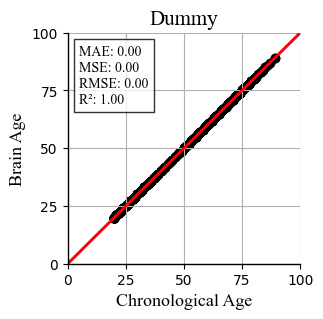

Error medio absoluto: 2.9270278986338215e-16
Error cuadrático medio: 1.612305281721554e-30
Raíz del error cuadrático medio: 1.2697658373580359e-15
Coeficiente de determinación (R²): 1.0


In [9]:
Plotters.plot_regresion(y=df_CN_avg_test['y_pred_corrected'],x= df_CN_avg_test['y_labels'], label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title=nameset,line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

                            OLS Regression Results                            
Dep. Variable:                 y_pred   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     208.7
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           5.02e-44
Time:                        21:06:10   Log-Likelihood:                 2204.5
No. Observations:                1323   AIC:                            -4405.
Df Residuals:                    1321   BIC:                            -4395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.6759      0.003    1.5e+04      0.0

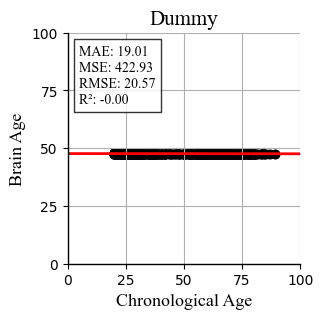

Error medio absoluto: 19.014246323201093
Error cuadrático medio: 422.93062033161056
Raíz del error cuadrático medio: 20.565277054579415
Coeficiente de determinación (R²): -0.0017744519162838923


In [18]:
Plotters.plot_regresion(y=df_CN_avg_test['y_pred'],x= df_CN_avg_test['y_labels'], label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title=nameset,line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

# SHAP

In [ ]:
shap_values_CN, shap_values_avg_CN, shap_summary_sorted_CN, shap_per_fold_CN = model.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_CN,'ID_unique', results_per_fold_CN_train, results_per_fold_CN_test, results_model['model'],scaler=Scaler_reg_train
)

In [22]:
with open('results_model/multiple_shap_summary_sorted_CN.pkl', 'wb') as f:
    pickle.dump(shap_summary_sorted_CN, f)

with open('results_model/multiple_shap_values_CN.pkl', 'wb') as f:
    pickle.dump(shap_values_CN, f)

In [6]:
with open('results_model/multiple_shap_summary_sorted_CN.pkl', 'rb') as f:
    shap_summary_sorted_CN = pickle.load(f)

with open('results_model/multiple_shap_values_CN.pkl', 'rb') as f:
    shap_values_avg_CN = pickle.load(f)


In [23]:
shap_summary_sorted_CN

[('Alpha2_canon_EPP_HPC_left', 0.0),
 ('Alpha2_canon_EPP_HPC_right', 0.0),
 ('Alpha2_canon_EPP_PARIET_left', 0.0),
 ('Alpha2_canon_EPP_PARIET_right', 0.0),
 ('Alpha2_canon_EPP_OCC_left', 0.0),
 ('Alpha2_canon_EPP_OCC_right', 0.0),
 ('Alpha2_canon_RPD_HPC_left', 0.0),
 ('Alpha2_canon_RPD_HPC_right', 0.0),
 ('Alpha2_canon_RPD_CING_left', 0.0),
 ('Alpha2_canon_RPD_CING_right', 0.0),
 ('Alpha2_canon_RPD_PARIET_left', 0.0),
 ('Alpha2_canon_RPD_PARIET_right', 0.0),
 ('Alpha2_canon_RPD_OCC_left', 0.0),
 ('Alpha2_canon_RPD_OCC_right', 0.0),
 ('High_subj_spec_EPP_HPC_left', 0.0),
 ('High_subj_spec_EPP_HPC_right', 0.0),
 ('High_subj_spec_EPP_CING_left', 0.0),
 ('High_subj_spec_EPP_CING_right', 0.0),
 ('High_subj_spec_EPP_PARIET_left', 0.0),
 ('High_subj_spec_EPP_PARIET_right', 0.0),
 ('High_subj_spec_EPP_OCC_left', 0.0),
 ('High_subj_spec_EPP_OCC_right', 0.0),
 ('High_subj_spec_RPD_HPC_left', 0.0),
 ('High_subj_spec_RPD_HPC_right', 0.0),
 ('High_subj_spec_RPD_CING_left', 0.0),
 ('High_subj_spec_

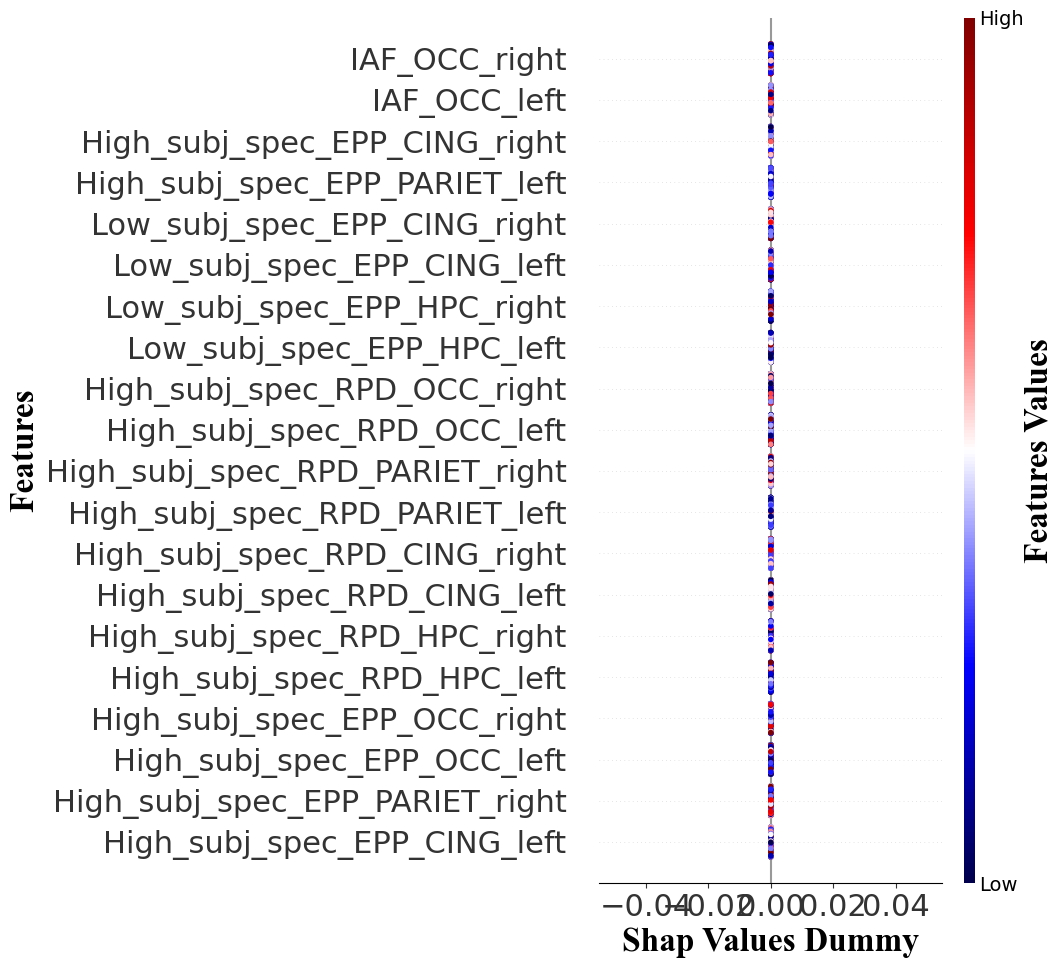

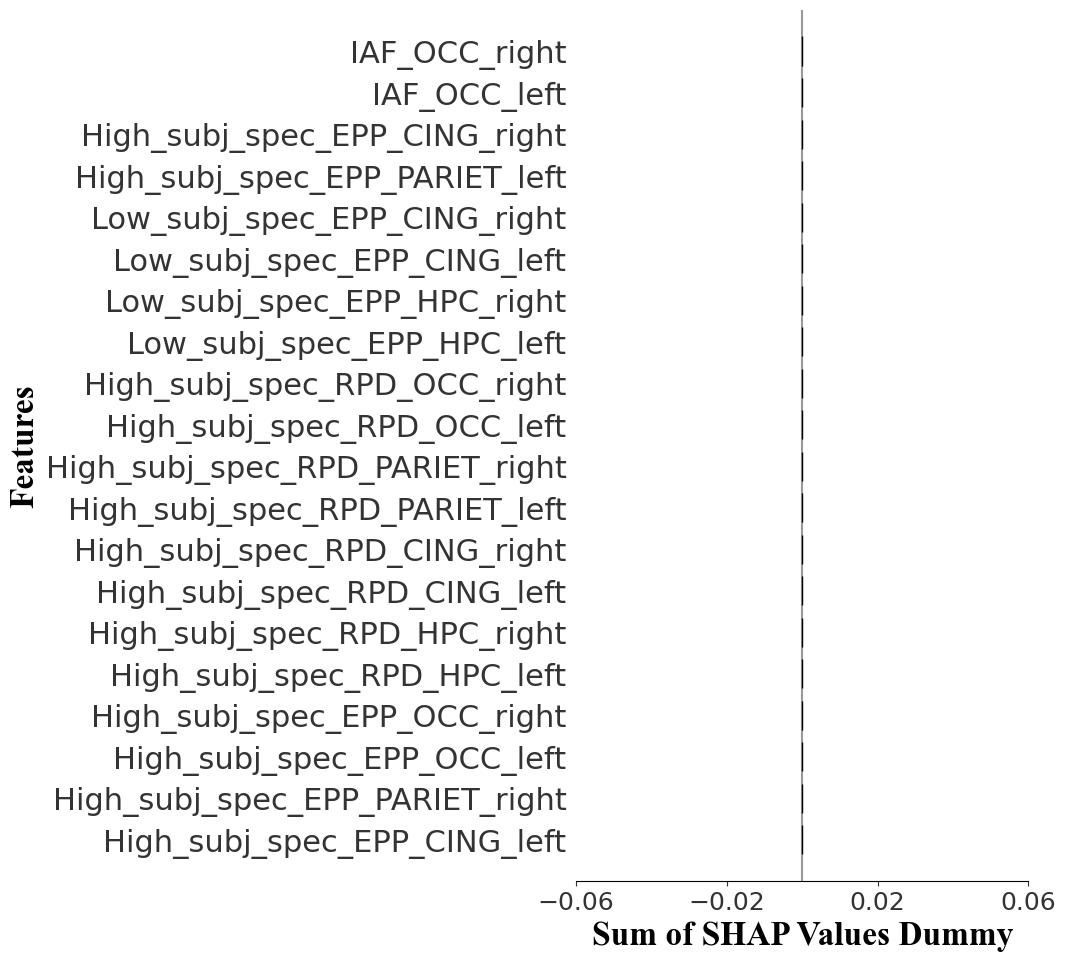

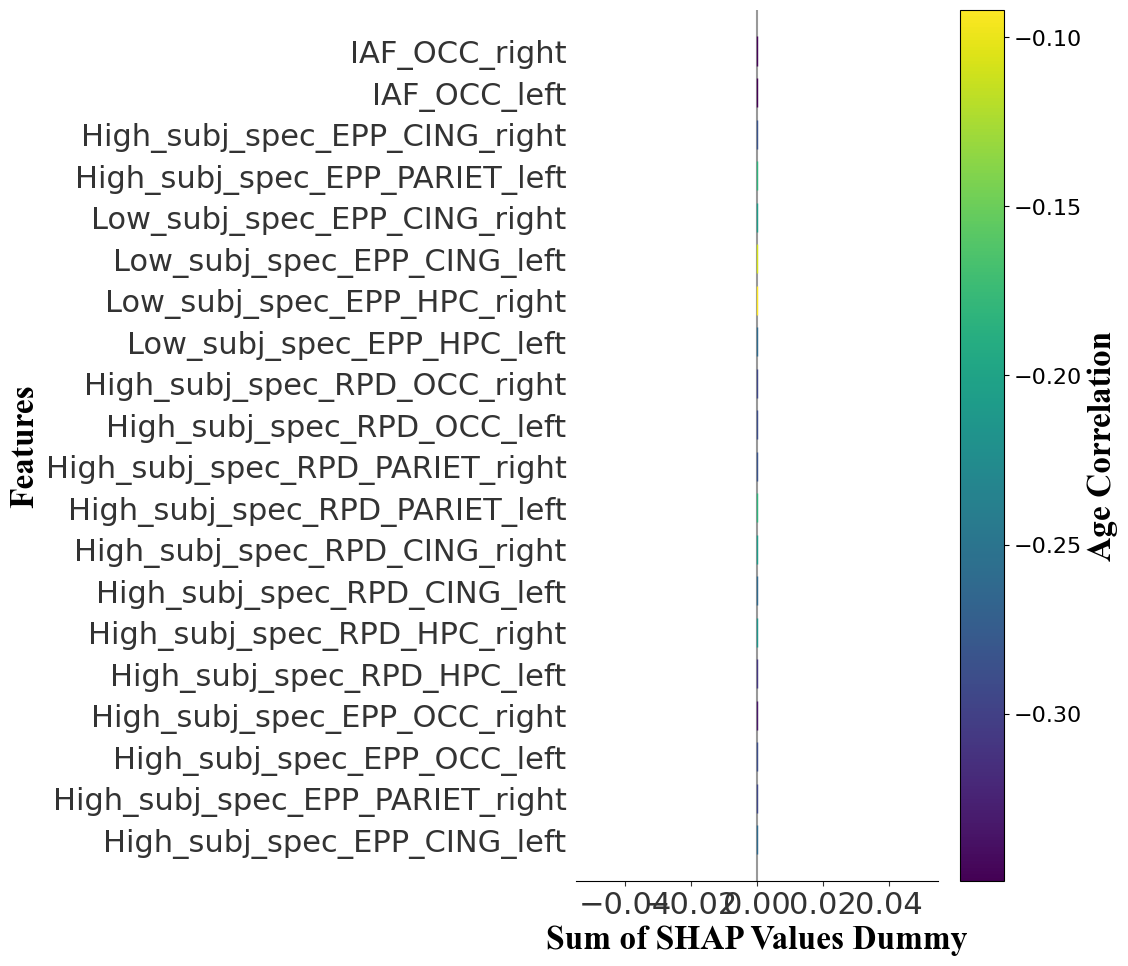

In [24]:
Plotters.plot_feature_importance(shap_values=shap_values_avg_CN,X_test=X_CN_scaled,y_test=y_CN, font= "Times New Roman", fontsize=24, xlabel1=f'Shap Values {nameset}', xlabel2=f'Sum of SHAP Values {nameset}',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [25]:
shap_por_region_sorted, resultado_normalizado_sorted=model.shap_region(shap_summary_sorted=shap_summary_sorted_CN, num_max=10)

HPC_left: nan
HPC_right: nan
PARIET_left: nan
PARIET_right: nan
OCC_left: nan
OCC_right: nan
CING_left: nan
CING_right: nan


C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:466: RuntimeWarning: invalid value encountered in scalar divide
  resultado_normalizado[region] = suma_shap / max_value


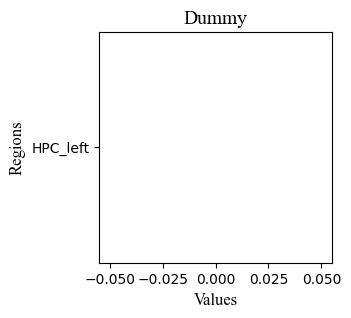

In [26]:
Plotters.plot_normalized_values(resultado_normalizado_sorted, color=colorset, name_set=nameset,x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\python_env\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


ValueError: alpha (nan) is outside 0-1 range

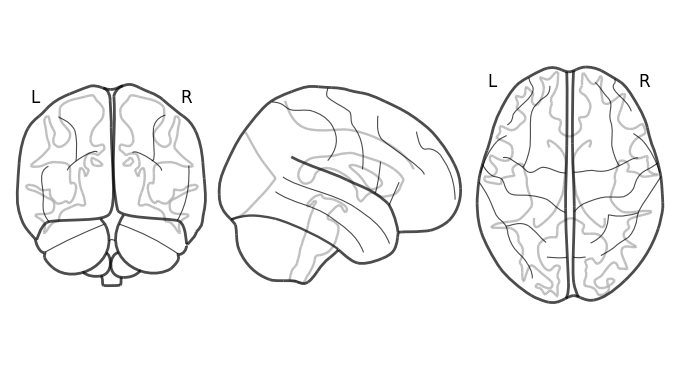

In [27]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(resultado_normalizado_sorted, base_path, color=colorset)

# Classification

In [28]:
from base_classifier import BaseClassifier
from Plotter import Plotter
from skopt.space import Real, Categorical, Integer
import xgboost as xgb

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import StratifiedKFold


class XGBoostClassifier(BaseClassifier):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="Lasso"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = xgb.XGBClassifier
        if params is None:
            self.params = {
            'objective': 'binary:logistic',  # Clasificación binaria
            'eval_metric': 'logloss',       # Métrica de evaluación
            'learning_rate': 0.1,           # Tasa de aprendizaje
            'max_depth': 6,                 # Profundidad máxima del árbol
            'subsample': 0.8,               # Proporción de muestras utilizadas por árbol
            'colsample_bytree': 0.8,        # Proporción de características utilizadas por árbol
            'reg_alpha': 0.1,               # Regularización L1
            'reg_lambda': 1.0,              # Regularización L2
            'gamma': 0.0,                   # Mínima reducción de pérdida para crear una división
            'min_child_weight': 1,          # Mínimo peso de la suma de los hijos para una división
            'n_estimators': 100,            # Número de árboles en el modelo
            'scale_pos_weight': 1.0         # Para datos desbalanceados
        }
        if params_space is None:
            self.params_space = {
            'objective': ['binary:logistic'],
            'eval_metric': ['logloss', 'error', 'auc', 'aucpr'],
            'learning_rate': Real(0.01, 0.3),
            'max_depth': Integer(3, 10),
            'subsample': Real(0.5, 1.0),
            'colsample_bytree': Real(0.5, 1.0),
            'reg_alpha': Real(0, 1.0),
            'reg_lambda': Real(0, 1.0),
            #'gamma': Real(0.0, 10.0),
            #'min_child_weight': Integer(1, 10),
            #'scale_pos_weight': Real(1.0, 10.0),
            'n_estimators': Integer(100, 2000),  # Número de árboles a probar
            #'n_estimators': [100]
        }

In [29]:
model_cls = XGBoostClassifier()
Plotters = Plotter()

#parametros de scaler
#1:sin scaler 2:Zscore 3:MinMax
Scaler=3

In [9]:
df_results_combined =df_CN_results

# Lista de columnas a limpiar
columns_to_clean = ['Educ', 'Sex', 'MMSE', 'GINI']

# Convertir las columnas a numérico, convirtiendo valores no numéricos a NaN
df_results_combined[columns_to_clean] = df_results_combined[columns_to_clean].apply(pd.to_numeric, errors='coerce')

# Eliminar filas donde cualquiera de las columnas especificadas es NaN
df_results_combined = df_results_combined.dropna(subset=columns_to_clean)

# Resetear el índice después de eliminar las filas
df_results_combined.reset_index(drop=True, inplace=True)

median_brain_age = df_results_combined['GAP_corrected'].median()
df_results_combined['brain_age_class'] = df_results_combined['GAP_corrected'].apply(lambda x: 1 if x > median_brain_age else 0)




C:\Users\felip\AppData\Local\Temp\ipykernel_5456\2760676698.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results_combined['brain_age_class'] = df_results_combined['GAP_corrected'].apply(lambda x: 1 if x > median_brain_age else 0)


In [11]:
df_results_combined


,ID_unique,y_labels,y_pred,y_pred_corrected,GAP,GAP_corrected,Country_ID,Age,Sex,Educ,MMSE,HDI,GINI,ODQ,brain_age_class
0,0,33.0,47.633078,33.0,14.633078,1.421085e-15,CUB_123_2_sub-10001,33.0,1.0,19.0,30.0,0.7578,40.70,99.282421,1
1,5,36.0,47.653751,36.0,11.653751,0.000000e+00,CUB_123_2_sub-10008,36.0,1.0,19.0,30.0,0.7578,40.70,99.374132,0
2,8,24.0,47.689321,24.0,23.689321,-5.329071e-16,CUB_123_2_sub-100011,24.0,1.0,13.0,28.0,0.7578,40.70,99.610847,0
3,10,42.0,47.665667,42.0,5.665667,1.065814e-15,CUB_123_2_sub-100013,42.0,1.0,13.0,30.0,0.7578,40.70,99.757089,1
4,11,35.0,47.715135,35.0,12.715135,1.421085e-15,CUB_123_2_sub-100016,35.0,1.0,13.0,30.0,0.7578,40.70,98.628049,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,1379,57.0,47.688646,57.0,-9.311354,0.000000e+00,CHI_TAK_sub-100017,57.0,2.0,17.0,30.0,0.8550,44.92,99.599221,0
689,1380,48.0,47.634897,48.0,-0.365103,1.421085e-15,CHI_TAK_sub-100018,48.0,2.0,17.0,28.0,0.8550,44.92,99.675799,1
690,1381,57.0,47.685666,57.0,-9.314334,1.065814e-15,CHI_TAK_sub-100019,57.0,2.0,17.0,29.0,0.8550,44.92,99.641446,1
691,1382,69.0,47.705567,69.0,-21.294433,1.776357e-15,CHI_TAK_sub-100020,69.0,2.0,12.0,30.0,0.8550,44.92,98.420503,1


In [31]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold


X = df_results_combined[['Sex', 'Educ', 'MMSE', 'GINI']]
y = df_results_combined['brain_age_class']
id = df_results_combined['ID_unique']
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

df_concatenado = pd.concat([X, y, id], axis=1, ignore_index=False)


In [32]:
opt_model_cls, best_params_cls =model_cls.search_best_model(X=X_scaled, y=y, n_iter_=30, scoring_metric='accuracy',n_splits=5)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [33]:
best_params_cls = opt_model_cls.best_params_

In [34]:
best_params_cls

OrderedDict([('colsample_bytree', 0.7360151879232661),
             ('eval_metric', 'logloss'),
             ('learning_rate', 0.28173980177599456),
             ('max_depth', 3),
             ('n_estimators', 1945),
             ('objective', 'binary:logistic'),
             ('reg_alpha', 0.11273941776234253),
             ('reg_lambda', 0.8454298658027712),
             ('subsample', 0.5)])

In [35]:
results_labels_df_train, results_labels_df_test,  results_model, results_per_fold_train, results_per_fold_test = model_cls.trainer(
        X=X,
        y=y,
        ID_label='ID_unique',
        ID=id,
        n_splits=5,
        n_iterations=20,
        params_=best_params_cls,
        scaler=Scaler
    )

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_classifier.py:196: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_train = pd.concat([results_labels_df_train, temp_df_train], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_classifier.py:198: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([res

In [36]:
# Lista de métricas por fold
metrics_per_fold_cls = [
    model_cls.clf_metrics(fold['y_labels'], fold['y_pred'], fold['y_prob'])
    for fold in results_per_fold_test
]

# Consolidar métricas por tipo
metrics_ = {key: [] for key in metrics_per_fold_cls[0].keys()}
for metrics in metrics_per_fold_cls:
    for key, value in metrics.items():
        metrics_[key].append(value)
        

In [37]:
metrics_

{'AUC': [0.44032793690327937,
  0.43734335839599,
  0.5044791666666666,
  0.4439153439153439,
  0.46779983108108114,
  0.4938898094449047,
  0.4049295774647887,
  0.4187422166874222,
  0.4234920634920634,
  0.48065742397137756,
  0.4769151138716356,
  0.4599567099567099,
  0.48386075949367086,
  0.436567947910103,
  0.5283038720538721,
  0.4993788819875776,
  0.42092584834520314,
  0.5057971014492754,
  0.4873310810810811,
  0.43088718510405255,
  0.4193273733503619,
  0.41496881496881505,
  0.5050125313283208,
  0.4451851851851852,
  0.48896363254151776,
  0.4983333333333333,
  0.47854477611940305,
  0.3952182952182952,
  0.5221774193548386,
  0.42434210526315785,
  0.4864457831325301,
  0.4158227848101266,
  0.49616977225672876,
  0.4193650793650794,
  0.48560016817321844,
  0.47110604805302403,
  0.4623700623700624,
  0.4177083333333333,
  0.45150679117147713,
  0.4659357036406217,
  0.47764830508474576,
  0.4704129416773095,
  0.4314618644067797,
  0.4909511784511784,
  0.415298821

In [38]:
with open("results_model/metrics_classification.pkl", "wb") as f:
    pickle.dump(metrics_, f)

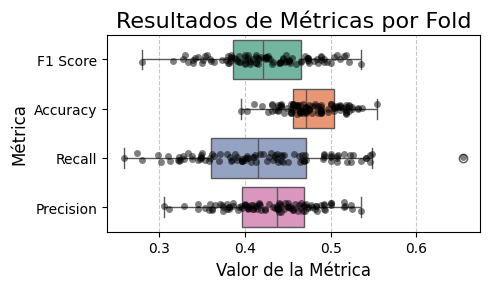

In [39]:
# Crear un DataFrame para las métricas de interés
metrics_df = pd.DataFrame({
    "F1 Score": metrics_["F1 Score"],
    "Accuracy": metrics_["Accuracy"],
    "Recall": metrics_["Recall"],
    "Precision": metrics_["Precision"]
})

Plotters.plot_metrics_clf(metrics_df)

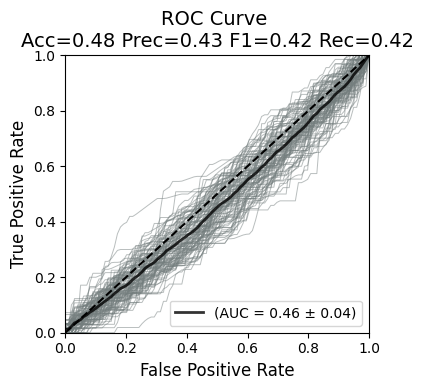

In [40]:
Plotters.graph_roc(metrics_, title="", individual=True, color_avg= 'black',treshold=0.0)


In [41]:
import numpy as np
f_scores, f_score_std, classes = model_cls.calculate_f_scores(metrics_, results_model, threshold=0.0)
print("Promedio de F-scores:", f_scores)
print("Desviación estándar de F-scores:", f_score_std)
print("Características:", classes)

Promedio de F-scores: [1248.52, 3627.3, 2588.72, 3035.86]
Desviación estándar de F-scores: [24.994991498298216, 45.825647840483384, 40.97659819946014, 36.98243366789157]
Características: ['Sex', 'Educ', 'MMSE', 'GINI']


In [ ]:
data_to_save = {
    "f_scores": f_scores,
    "f_score_std": f_score_std,
    "classes": classes
}

# Guardar en un archivo pickle
with open("results_model/f_scores_data_classification.pkl", "wb") as f:
    pickle.dump(data_to_save, f)

In [49]:
f_scores

[1248.52, 3627.3, 2588.72, 3035.86]

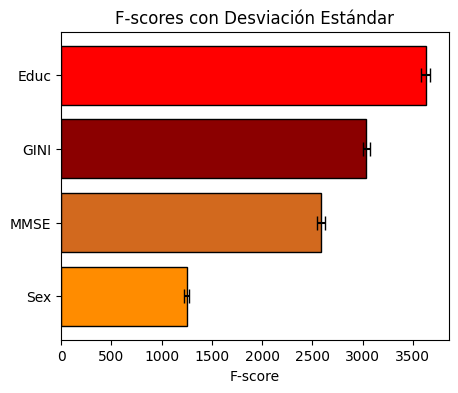

In [50]:
Plotters.plot_f_scores(f_scores, f_score_std, classes, colors=['darkorange', 'red', 'chocolate', 'darkred'],x_size=5)


In [51]:
results_model['model'][50].get_booster().get_score()

{'Sex': 1238.0, 'Educ': 3632.0, 'MMSE': 2600.0, 'GINI': 3083.0}

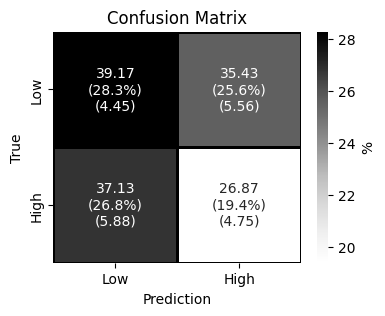

In [46]:
Plotters.C_Matrix(metrics_, threshold=0.0)

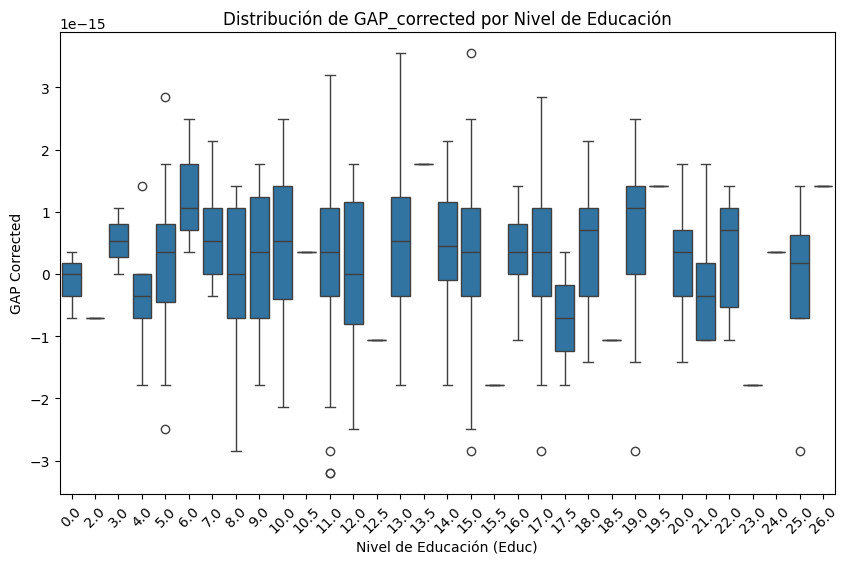

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Educ', y='GAP_corrected', data=df_results_combined)

# Personalizar el gráfico
plt.title('Distribución de GAP_corrected por Nivel de Educación')
plt.xlabel('Nivel de Educación (Educ)')
plt.ylabel('GAP Corrected')
plt.xticks(rotation=45)  # Si es necesario, rota las etiquetas del eje X para mayor claridad

# Mostrar el gráfico
plt.show()
